# Reference:
https://pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/

In [315]:
import numpy as np
import cv2
import imutils

from matplotlib import pyplot as plt
from imutils import perspective, contours
from scipy.spatial import distance as dist

%matplotlib inline


In [316]:
def midpoint(point_a, point_b):
    return (
        (point_a[0] + point_b[0]) / 2,
        (point_a[1] + point_b[1]) / 2
    )

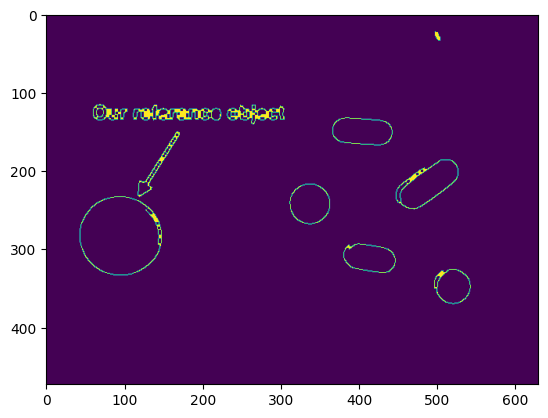

In [317]:
reference_width = 10
image = cv2.imread('../resources/object-measure/sample.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)

# perform edge detection and remove noise
edged = cv2.Canny(gray, 50, 150)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# sort contours from left to right
cnts, _ = contours.sort_contours(cnts)
pixel_per_metric = None

plt.imshow(edged)


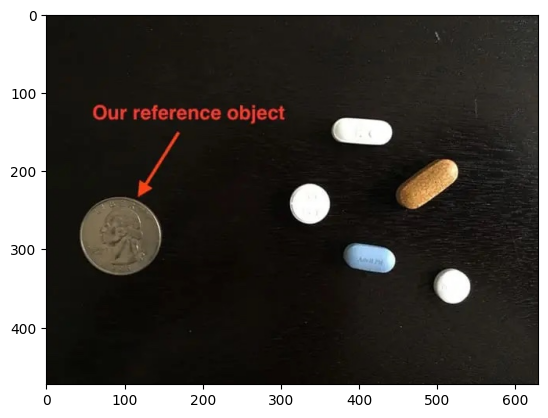

In [318]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

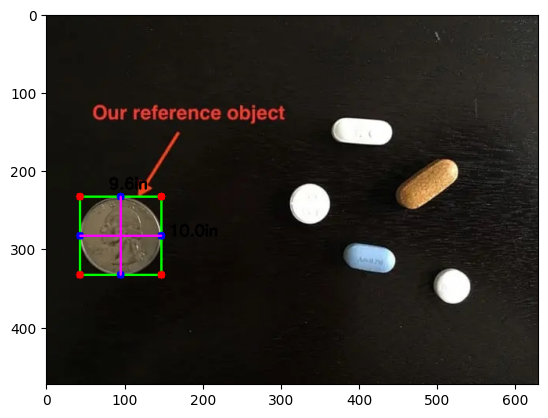

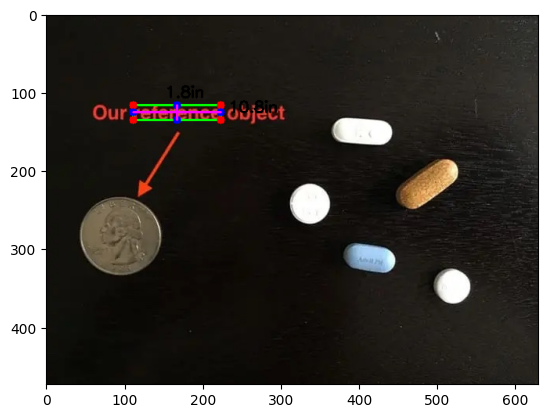

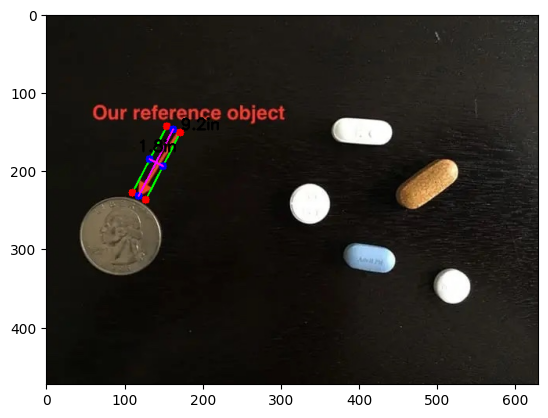

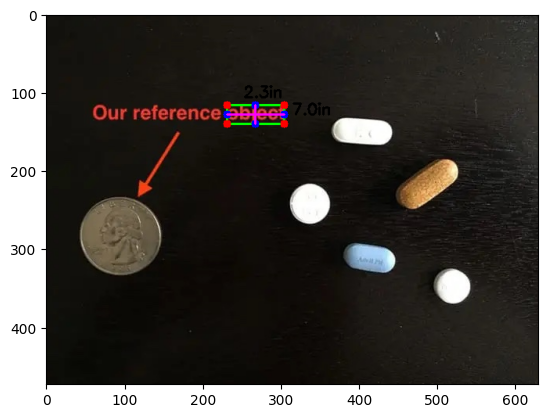

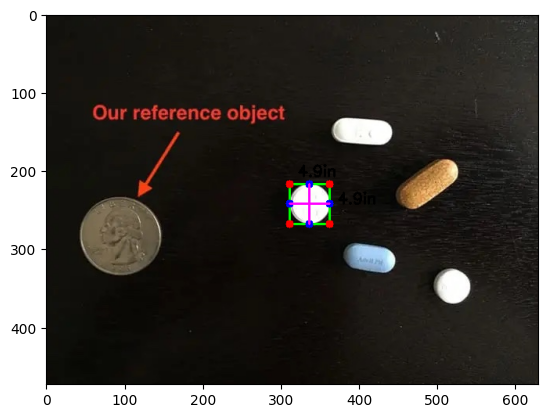

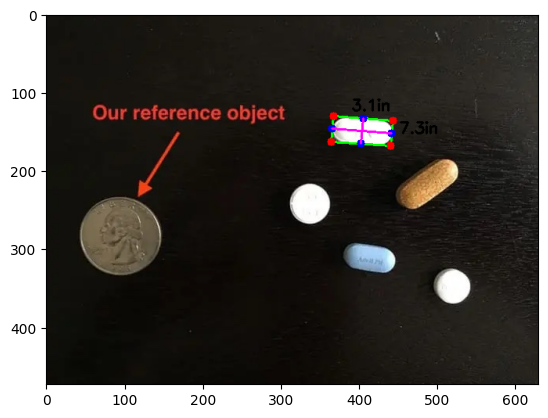

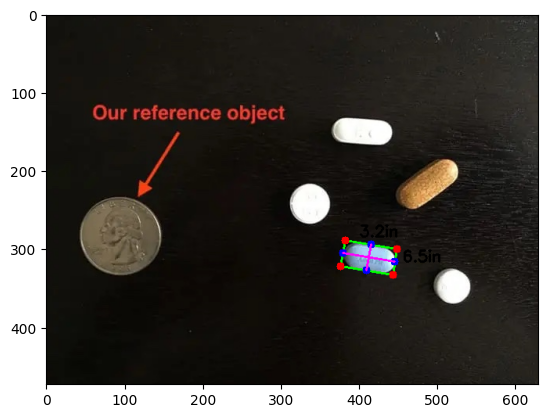

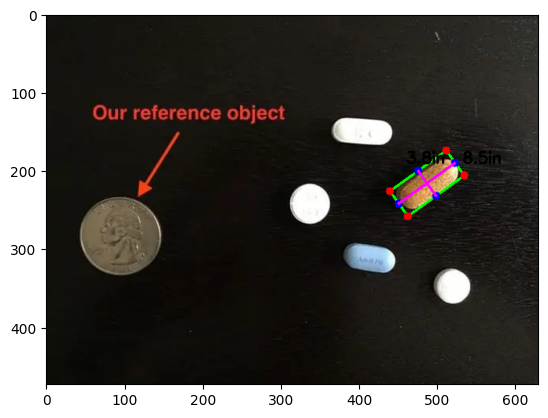

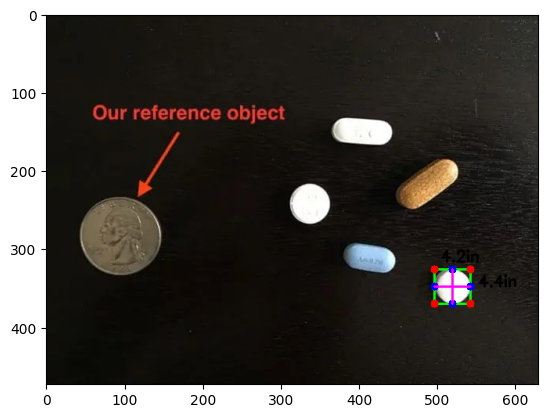

: 

In [319]:
for c in cnts:
    if cv2.contourArea(c) < 500:
        continue
    
    # compute the bounding box
    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype='int')
    
    # order the point from top-left, top-right, bottom-right and bottom-left
    # in clockwise order
    box = perspective.order_points(box).astype('int')
    cv2.drawContours(orig, [box], -1, (0,255,0), 2)
    
    for x,y in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0,0,255), -1)
        
    tl, tr, br, bl = box
    tx, ty = midpoint(tl, tr)
    bx, by = midpoint(bl, br)

    tblx, tbly = midpoint(tl, bl)
    tbrx, tbry = midpoint(tr, br)

    cv2.circle(orig, (int(tx), int(ty)), 5, (255,0,0), -1)
    cv2.circle(orig, (int(bx), int(by)), 5, (255,0,0), -1)
    cv2.circle(orig, (int(tblx), int(tbly)), 5, (255,0,0), -1)
    cv2.circle(orig, (int(tbrx), int(tbry)), 5, (255,0,0), -1)

    cv2.line(orig, (int(tx), int(ty)), (int(bx), int(by)), (255,0,255), 2)
    cv2.line(orig, (int(tblx), int(tbly)), (int(tbrx), int(tbry)), (255,0,255), 2)

    da = dist.euclidean((tx, ty), (bx, by))
    db = dist.euclidean((tblx, tbly), (tbrx, tbry))
    if pixel_per_metric is None:
        pixel_per_metric = db / reference_width
        
    dim_a = da / pixel_per_metric
    dim_b = db / pixel_per_metric

    cv2.putText(orig, '{:.1f}in'.format(dim_a), (int(tx - 15), int(ty - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0,0,0), 2)
    cv2.putText(orig, '{:.1f}in'.format(dim_b), (int(tbrx + 10), int(tbry)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0,0,0), 2)

    plt.figure()
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.show()